## Task 1: Choose a Research Question ##

**Step 1** 

Brainstorm three industries or topics that you most interested in exploring for this project.

**Step 1 Answer**

Write your answer for Step 1 here.

Restaurant Industry
Operational Costs
Rising Food Costs

**Step 2** 

Pick the industry or topic from Step 1 that interests you the most.  Brainstorm three potential research questions that you could answer for this project.  **Right now, the question will be fairly broad.  You will refine your research question once you select your data set.**  Each potential research question should have the following qualities:

**Step 2 Answer**

Write your answer for Step 2 here.

One of my biggest concerns with the restaurant industry is Food Costs.
If we are able to predict the amount of each menu item we will sell per day.
We could -- In Theory -- order a more accurate amount of product and potentially have less waste. 

Another question maybe could be efficiency in the kitchen.
Something like average time per task and average amount of items completed of that task that could potentially give us leeway to plan out more things in a certain timeframe
Thus be able to prioritize better in the kitchen potentially leading to long term efficiency

I think if we were able to build good models for the questions above, that could lead to being able to plan for ACTUAL 8/10 hour shifts instead of doing extra hours to account for inefficiency.

BUT I guess at the end of the day, This would assume that there isnt a random last minute change in reservations or shorted orders and things like that, that is out of our control

**Step 3** 

Rank your three potential research questions from Step 2 in order from one to three with one being your top choice and two and three being backup choices.  

When ranking your research questions, think both about what interests you the most and what will be practical.  How well-defined is each research question?  How difficult will it be to find data to answer that question?  How difficult will it be to wrangle the data?  How confident do you feel about selecting an ML model to answer the research question?

This is a great time to involve your instructor, who can provide guidance on revising your ideas in Step 2 and identifying your top and backup research questions. 

**Step 3 Answer**

Write your answer for Step 3 here.

Ranking probably would be
1 - Efficiency
2 - Food Costs
3 - Time at Work

I feel like the questions are definitely well-defined.
The main problem with this I think is finding data sets to work with.
I don't think it's a common research problem for ML engineers, nor do I think the restaurant industry as a whole cares about the problem.

### Task 2: Select a Data Set  ###

**Step 1** 

Find at least one data set that you can use to answer your research question from Task 1.  

Your data set should:
* Be at least 100 records long.  You'll need a lot more records if you want to use a neural network.  
* Be publicly available on the Internet. Don't collect your own data.  Don’t use data that can’t be attributed to a reputable source.
* Have at least four features (remember that, when modeling text data, each word is a feature).

This is another good opportunity to check in with your instructor and make sure you are on the right track.  

**Step 1 Answer**

Write a short description of your data set and it's location (URL or where you saved it on your computer) here.  

Unfortunately, I wasn't able to find a good data set that met the requirements or even anywhere close to what I wanted really. So, if we are being fully transparent. I just settled for this, but
I do find this interesting just from a food stand point. In a sense of respecting the animals (ie: not killing them for no reason) and understanding my ingredients to produce better flavors and experiences

https://archive-beta.ics.uci.edu/dataset/1/abalone

The data set contains physical features of abalone.
The ML model would be a regression problem to try and predict the age of an abalone by trying to find the amount of rings on them.

**Step 2** 

Refine your research question so it applies to your specific data set.  

For example, if your broad research question was "How can I use machine learning to group customers by what they buy?" and you select a data set that contains Target holiday shopping orders, your refined research question might be something like, "Can I group Target customers by their holiday shopping orders?"

**At this point, it is possible that you will discover that you can't find a data set and research question that work well together.  Work with your instructor to either modify your current question or select one of your backup research questions above. To complete this task successfully, you will need to have selected a research question AND have a data set that can be used to answer it.**

**Step 2 Answer**

Write your refined research question here.

With the data set given. Am I able to build and optimize a model to accurately predict their age? Do I HAVE to resort to an ANN to get an accurcyate model since the values have been scaled for it?

In [1]:
# Importing General Use Libraries/Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import r2_score, mean_squared_error as MSE, mean_absolute_error as MAE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb

# !pip install xgboost
# !pip install pycaret
# !pip install pycaret[full]
# !pip install pycaret[models]

import warnings
warnings.filterwarnings("ignore")

# Neural Network Libraries
import math
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [2]:
abalone = pd.read_csv('abalone.data')

### Task 3: Conduct Exploratory Data Analysis ###

**Step 1** 

Determine the type(s) of machine learning model(s) you will use to answer your research question.  There might be only one type of model that will work, or you might have a number of models to choose from.

**Step 1 Answer**

Write your answer for Step 1 here.

Realistically, I wanna try them all.
I mean in a real world scenario, I get there would be deadlines and potentially be working on multiple projects at once, BUT
from a learning stand point. I'm gonna build as much as I can just to keep familiarizing myself with the models and parameters/hyperparameters.

**Step 2** 

Are there any requirements your data must meet to use the ML model(s) you listed in Step 1?  For example, if you plan to use a logistic regression model, you must have a categorical target.  If you wish to use natural language processing, you'll need a large amount of text data.

**Step 2 Answer**

Write your answer for Step 2 here.

I have a Discrete Variable as my target value for the Linear Regression. Without looking it up. Im unsure how that affects the regression model from Continuous vs Discrete, though I believe they are treated the same.

In [3]:
abalone.tail()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4175,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [4]:
abalone.shape

(4176, 9)

In [5]:
# Setting column names because they were missing for some reason
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_Weight', 'Shucked_Weight', 'Viscera_Weight', 'Shell_Weight', 'Rings']

In [6]:
abalone.head(10)

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
5,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
6,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
7,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
8,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19
9,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.210,14


**Step 3** 

Using visualizations or summary data, show that the requirements you listed in Step 2 are met by your data.  Feel free to add code blocks as necessary.


In [7]:
abalone.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_Weight      float64
Shucked_Weight    float64
Viscera_Weight    float64
Shell_Weight      float64
Rings               int64
dtype: object

In [8]:
abalone.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_Weight      0
Shucked_Weight    0
Viscera_Weight    0
Shell_Weight      0
Rings             0
dtype: int64

In [9]:
abalone.describe()

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [10]:
# I need to encode Sex to be able to include it in the correlations
    # Now we know the Sex isn't correlated and probably won't be a feature we use moving foreward
abalone.corr()

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
Length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
Diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
Height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
Whole_Weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
Shucked_Weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
Viscera_Weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
Shell_Weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
Rings,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


In [11]:
abalone.loc[abalone['Sex'] == 'M', 'sex'] = 0
abalone.loc[abalone['Sex'] == 'F', 'sex'] = 1
abalone.loc[abalone['Sex'] == 'I', 'sex'] = 2

### Task 4: Develop a Project Plan ###

**Step 1** 

Write about one paragraph of background to give your audience some context for your research question.  What motivated you to ask this specific research question?  What is the real world application?  Think about your stakeholder(s) and what that person would want to know about the topic before you got started.

**Step 1 Answer**

It seems that Abalone has been an endagered species for a long time. Due to warming ocean temperatures, over fishing and other factors.
Researching the age of abalone ecosystems could to a better understanding of them and allow us to deploy conservation efforts and help with nurturing them for growth and survival.

**Step 2** 

Write one or two paragraphs describing your data set.  What was the source of the data?   Why did you choose to use this particular data set?  Did you experience any challenges with accessing or loading the data?  Describe any data wrangling you need to do to run your ML model.

**Step 2 Answer**

The data set comes from the University of Irvine Machine Learning Repository.
Coming from a Chef's background, understanding and respecting your ingridients are pivotal to crafting cohesive dishes and experiences for guests.
The only challenge I am having with the data set itself is that I am uncertain about it's pre-scaled values. Per the description of the data set, it's already scaled for use with an ANN model.
The data set didn't have any missing values, so there wasn't any wrangling for that. Though, the data did't have column names when imported. So I had to declase those.

**Step 3**

Write one paragraph describing the model or models you plan to use.  Why did you pick this model or models?  How will they answer your research question?  What metrics will you use to evaluate the model performance?  

**Step 3 Answer**

Actually, I found this really cool python package called pycaret. (Documentation here: https://pycaret.gitbook.io/docs/)
They have an extension that does Model Selection that I actually found very useful and super cool to explore.
I found this after I had already tested numerous models. After evaluating, I found that the initial model selection package from pycaret wasn't exactly the number I got from my own models, but they were very close!
I did decide that I wanted to evalute my models using RMSE, MAE and R2 using .score() function

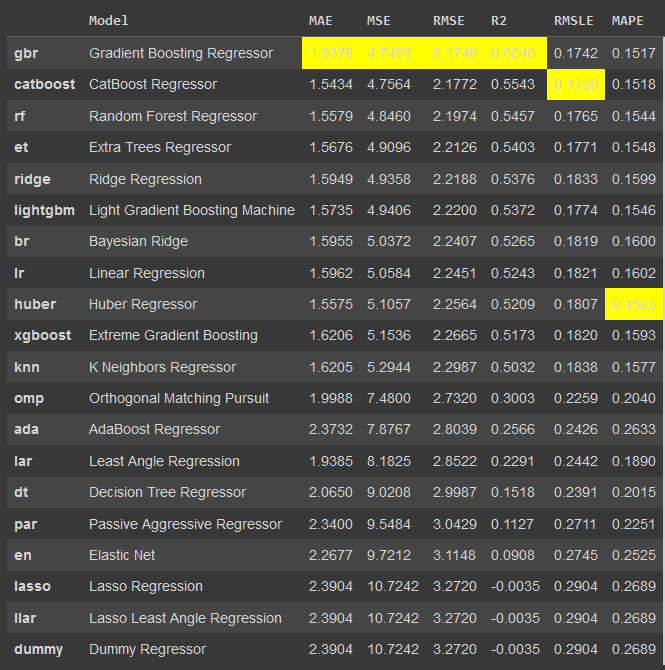

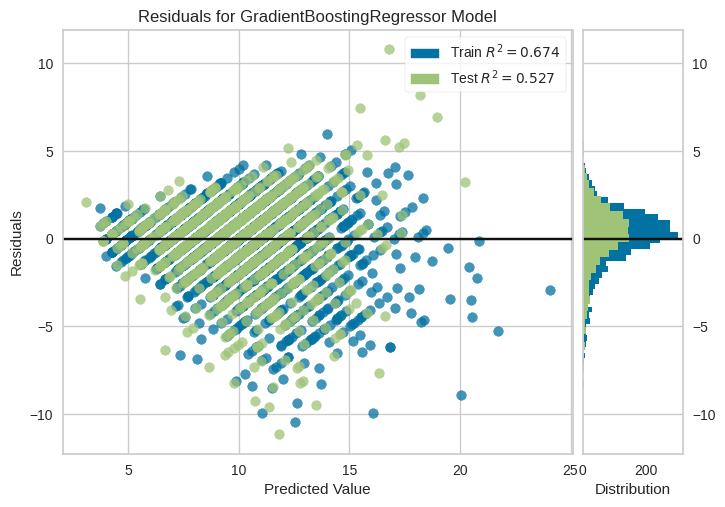

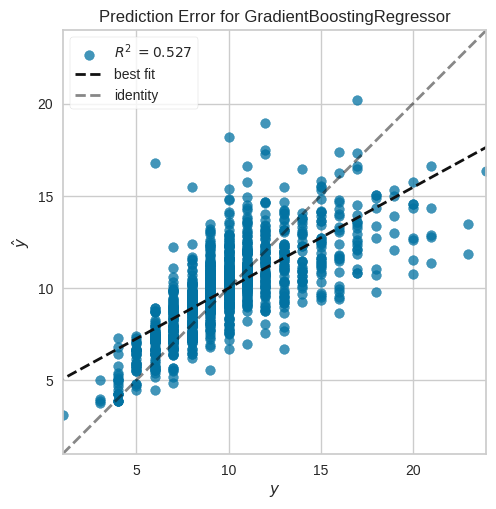

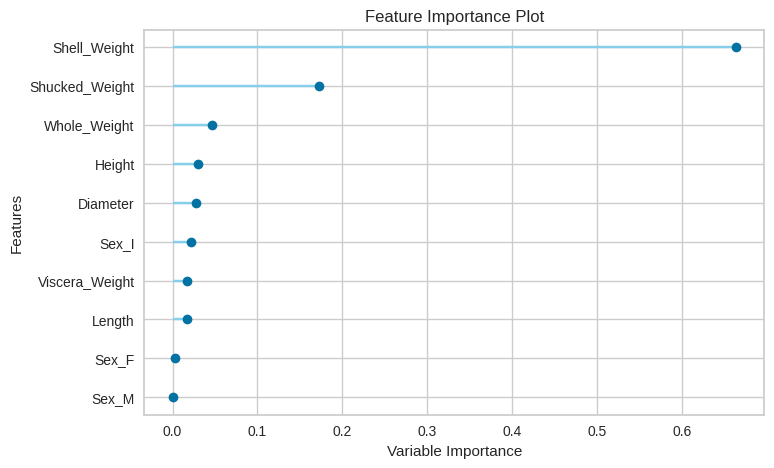

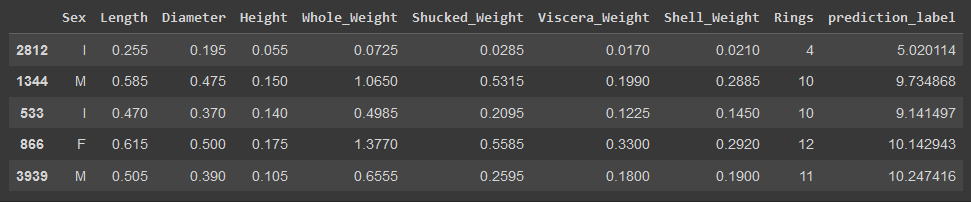

**Step 4**

Think about your intended audience.  How will you communicate your results to your stakeholders?  What data storytelling techniques will you use in your presentation to engage your audience?

**Step 4 Answer**

Understanding the keys to Data Storytelling is very important. Identifying Insights, Being careful about personal bias, helping the audience understand context, providing the relevant data to my goals, and assembling the story with step by step explanations
and making sure its cohesive for a smooth flow. I believe if I follow these steps and make sure I build the right story with the correct modes of persuasion. We can CHANGE THE WORLD xD, no, but really. 100%

## Task 6: Modeling and Task 7: Evaluation ##

## Train/Test Split ##

In [12]:
# Initial Split for Target Variable and Features of Interest
X = abalone[['Shell_Weight', 'Whole_Weight', 'Shucked_Weight', 'Height']]
y = abalone['Rings']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

## Linear Regression as a Baseline Model ##

In [13]:
lin_pipe = Pipeline([
                ('scaler', MinMaxScaler()),
                ('lin_reg', LinearRegression())])

lin_pipe.fit(X_train, y_train)

lin_pipe_scores = cross_val_score(lin_pipe, X_train, y_train, cv = 10) 

y_pred = lin_pipe.predict(X_train)
RMSE_train = MSE(y_train, y_pred, squared = False)
MAE_train = MAE(y_train, y_pred)

print(lin_pipe_scores.mean())
print(RMSE_train)
print(MAE_train)


0.4640659945616889
2.252003197103873
1.650172823187291


### LR Evaluation ###

In [14]:
lin_pipe.fit(X_test, y_test)
lin_pipe_scores = cross_val_score(lin_pipe, X_test, y_test, cv = 10) 



y_pred_test = lin_pipe.predict(X_test)
RMSE_test = MSE(y_test, y_pred_test, squared = False)
MAE_test = MAE(y_test, y_pred_test)

print('Mean R2' , lin_pipe_scores.mean())
print('RMSE' , RMSE_test)
print('MAE' , MAE_test)

Mean R2 0.5339527765638417
RMSE 2.2601906361971333
MAE 1.6198218999015352


In [15]:
y_pred_test

array([11.6381132 ,  7.69568325, 10.18552133, ...,  8.71686758,
       10.09990058, 16.90829067])

## KNeighbors Regressor ##

In [16]:
knn_pipe = Pipeline([
                ('scaler', MinMaxScaler()),
                ('KNN', KNeighborsRegressor())])

knn_pipe.fit(X_train, y_train)

knn_pipe_scores = cross_val_score(knn_pipe, X_train, y_train, cv = 10) 

y_pred_k = knn_pipe.predict(X_train)
RMSE_train = MSE(y_train, y_pred_k, squared = False)
MAE_train = MAE(y_train, y_pred_k)

print(knn_pipe_scores.mean())
print(RMSE_train)
print(MAE_train)

0.4822515807162014
1.8332206395038695
1.3176188847074923


### KNeighbors Evaluation ###

In [17]:
knn_pipe.fit(X_test, y_test)

y_pred_k_test = knn_pipe.predict(X_test)
RMSE_test = MSE(y_test, y_pred_k_test, squared = False)
MAE_test = MAE(y_test, y_pred_k_test)

knn_pipe_scores = cross_val_score(knn_pipe, X_test, y_test, cv = 10) 

print('Mean R2', knn_pipe_scores.mean())
print('RMSE', RMSE_test)
print('MAE', MAE_test)

Mean R2 0.49032633842513046
RMSE 1.935801233753135
MAE 1.3284916201117318


## Decision Tree Regressor ##

In [18]:
tree_pipe = Pipeline([
                ('scaler', StandardScaler()),
                ('tree', DecisionTreeRegressor(random_state = 42))
])

tree_pipe.fit(X_train, y_train)

tree_pipe_scores = cross_val_score(tree_pipe, X_train, y_train, cv = 10) 

y_pred_t = tree_pipe.predict(X_train)
RMSE_train = MSE(y_train, y_pred_t, squared = False)
MAE_train = MAE(y_train, y_pred_t)


print(tree_pipe_scores.mean())
print(RMSE_train)
print(MAE_train)

0.12210887336654637
0.0
0.0


### Decision Tree Evaluation ###

In [19]:
tree_pipe.fit(X_test, y_test)

tree_pipe_scores = cross_val_score(tree_pipe, X_test, y_test, cv = 10) 

y_pred_t_test = tree_pipe.predict(X_test)
RMSE_test = MSE(y_test, y_pred_t_test, squared = False)
MAE_test = MAE(y_test, y_pred_t_test)


print(tree_pipe_scores.mean())
print(RMSE_test)
print(MAE_test)

0.07043135732524673
0.0
0.0


In [20]:
print(y_test)

866     12
1483     9
599     17
1702    10
670     17
        ..
1513    11
162     18
2206     8
3980     8
3075    11
Name: Rings, Length: 1253, dtype: int64


In [21]:
print(y_pred_t_test)

[12.  9. 17. ...  8.  8. 11.]


## Random Forest Regressor ##

In [22]:
forest_pipe = Pipeline([
                    ('scaler', MinMaxScaler()), 
                    ('tree', RandomForestRegressor(random_state=42))])

forest_pipe.fit(X_train, y_train)

forest_pipe_scores = cross_val_score(knn_pipe, X_train, y_train, cv = 10) 

y_pred_r = forest_pipe.predict(X_train)
RMSE_train = MSE(y_train, y_pred_r, squared = False)
MAE_train = MAE(y_train, y_pred_r)


print(forest_pipe_scores.mean())
print(RMSE_train)
print(MAE_train)

0.4822515807162014
0.824763352575943
0.5948374957235717


### Random Forest Evaluation ###

In [23]:
forest_pipe.fit(X_test, y_test)

forest_pipe_scores = cross_val_score(knn_pipe, X_test, y_test, cv = 10) 

y_pred_r_test = forest_pipe.predict(X_test)
RMSE_test = MSE(y_test, y_pred_r_test, squared = False)
MAE_test = MAE(y_test, y_pred_r_test)


print(forest_pipe_scores.mean())
print(RMSE_test)
print(MAE_test)

0.49032633842513046
0.8859130765768166
0.6135035913806863


## It's GradientBOOST SZN ##

In [24]:
boost_pipe = Pipeline([
                    ('scaler', StandardScaler()), 
                    ('gradient', GradientBoostingRegressor(random_state = 123, loss = 'huber'))])

boost_pipe.fit(X_train, y_train)

boost_pipe_scores = cross_val_score(boost_pipe, X_train, y_train, cv = 7) 

y_pred_b = boost_pipe.predict(X_train)
RMSE_train = MSE(y_train, y_pred_b, squared = False)
MAE_train = MAE(y_train, y_pred_b)


print(boost_pipe_scores.mean())
print(RMSE_train)
print(MAE_train)

# The next few block will be to try and tune this model via cv folds/learning_rate and max_depth
# Also note that I did test the different loss parameter

0.5281918027017055
1.9541176994663996
1.3689713690417553


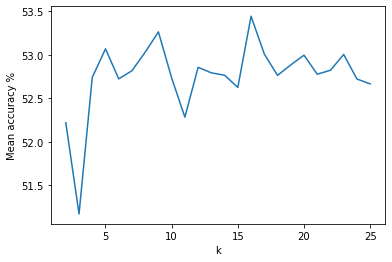

In [25]:
k = list(range(2,26))
mean_accuracy = []

for i in k:
  boost_pipe_scores = cross_val_score(boost_pipe, X_train, y_train, cv = i) 
  mean_accuracy.append(boost_pipe_scores.mean())


k_df = pd.DataFrame(k)
k_df.rename({0:'k'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_df, mean_accuracy_df], axis=1)

plt.plot(to_plot['k'], to_plot['mean accuracy'])
plt.xlabel('k')
plt.ylabel('Mean accuracy %')
plt.show()

   learning rate  mean accuracy
0            0.1      52.843700
1            0.2      52.172367
2            0.3      50.395685
3            0.4      49.961775
4            0.5      47.107452


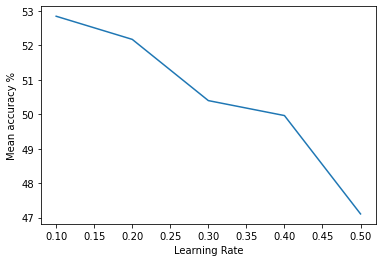

In [26]:
mean_accuracy = []

for i in [0.10, 0.20, 0.30, 0.40, 0.50]:
  boost_pipe = Pipeline([
                    ('scaler', StandardScaler()), 
                    ('gradient', GradientBoostingRegressor(random_state = 42, loss= 'huber', learning_rate = i))])
  boost_pipe.fit(X_train, y_train)
  boost_pipe_scores = cross_val_score(boost_pipe, X_train, y_train, cv=7)
  mean_accuracy.append(boost_pipe_scores.mean())


learning_rate_df = pd.DataFrame([0.10, 0.20, 0.30, 0.40, 0.50])
learning_rate_df.rename({0:'learning rate'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([learning_rate_df, mean_accuracy_df], axis=1)

print(to_plot)

plt.plot(to_plot['learning rate'], to_plot['mean accuracy'])
plt.xlabel('Learning Rate')
plt.ylabel('Mean accuracy %')
plt.show()

   max_depth  mean accuracy
0          3      52.843700
1          4      52.436309
2          5      51.350091
3          6      50.988086
4          7      48.992346
5          8      48.193486
6          9      47.077677
7         10      45.388598
8         11      43.933506
9         12      41.935740


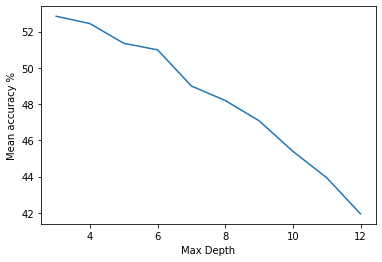

In [27]:
mean_accuracy = []

for i in [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
    boost_pipe = Pipeline([
                    ('scaler', StandardScaler()), 
                    ('gradient', GradientBoostingRegressor(random_state = 42, loss= 'huber', max_depth = i))])

    boost_pipe.fit(X_train, y_train)

    boost_pipe_scores = cross_val_score(boost_pipe, X_train, y_train, cv = 7) 
    mean_accuracy.append(boost_pipe_scores.mean())


max_depth_df = pd.DataFrame([3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
max_depth_df.rename({0:'max_depth'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([max_depth_df, mean_accuracy_df], axis=1)

print(to_plot)

plt.plot(to_plot['max_depth'], to_plot['mean accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Mean accuracy %')
plt.show()

### GBR Evaluation ###

In [28]:
boost_pipe.fit(X_test, y_test)

boost_pipe_scores = cross_val_score(boost_pipe, X_test, y_test, cv = 7) 

y_pred_b_test = boost_pipe.predict(X_test)
RMSE_test = MSE(y_test, y_pred_b_test, squared = False)
MAE_test = MAE(y_test, y_pred_b_test)


print('Mean R2' , boost_pipe_scores.mean())
print('RMSE' , RMSE_test)
print('MAE' , MAE_test)

Mean R2 0.33560782177374665
RMSE 0.17008320446384023
MAE 0.026983120520541408


### You know.... I probably shoulve made a function so I don't have to copy/pasta and edit this code a billion times ###
# ^^^^^^^^^^^^ Do this for future reference ^^^^^^^^^^^^ #

## Artificial Neural Network ##

This is kinda like just a test? Exploration?
Not a main point I wanna focus on for this project, but definitely want to look into.
On the website I found the data set. It explicitly says that the data is scaled to work with an ANN.
So, I wonder how that affects other ML models since it's prescaled. 
    Did I even need to Standard/MinMax scale them? PLS SEND HELP!

In [29]:
# # create some sample data
# X = abalone.drop(['Sex', 'sex', 'Rings'], axis = 1)
# y = abalone['Rings']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# define the model architecture
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))  # look at this activation function. this is probably wrong

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


# train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data = (X_test, y_test))


# This runs, but the loss is HUGE. The binary_accuracy is a weird number and I dont actually understand it now. xD
        ## PLEASE. SEND. HELP!!
    
# binary_accuracy is just WRONG ... :)
    # this is NOT a classification

# make sure we splittin my boy :)

Epoch 1/100
293/293 [==============================] - 1s 2ms/step - loss: 93.1091 - val_loss: 49.1868
Epoch 2/100
293/293 [==============================] - 0s 2ms/step - loss: 15.2703 - val_loss: 8.9187
Epoch 3/100
293/293 [==============================] - 0s 1ms/step - loss: 8.0398 - val_loss: 8.1288
Epoch 4/100
293/293 [==============================] - 0s 1ms/step - loss: 7.2839 - val_loss: 7.5648
Epoch 5/100
293/293 [==============================] - 0s 1ms/step - loss: 6.7497 - val_loss: 7.1522
Epoch 6/100
293/293 [==============================] - 0s 1ms/step - loss: 6.3521 - val_loss: 6.6189
Epoch 7/100
293/293 [==============================] - 0s 1ms/step - loss: 5.8563 - val_loss: 6.1971
Epoch 8/100
293/293 [==============================] - 0s 2ms/step - loss: 5.5500 - val_loss: 5.9627
Epoch 9/100
293/293 [==============================] - 0s 1ms/step - loss: 5.3189 - val_loss: 5.6762
Epoch 10/100
293/293 [==============================] - 0s 2ms/step - loss: 5.1540 - val

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(32, input_dim = 7, activation ='relu'))
model.add(Dense(16, activation ='relu'))
model.add(Dense(1, activation = 'relu'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])

# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Evaluate the model on the testing data
loss = model.evaluate(X_test, y_test)
print('Test loss:', loss)

ValueError: in user code:

    File "C:\Users\GangGang\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\GangGang\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\GangGang\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\GangGang\anaconda3\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\GangGang\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\GangGang\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 7), found shape=(None, 4)
